In [1]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt
import pickle

#.py
from core import qlearning as q 
from core import prices as pr 


In [2]:
import pickle

# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_delta.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[0.32874556, 0.25318318],
       [0.27354353, 0.27390725],
       [0.26489202, 0.28659725],
       ...,
       [0.28343504, 0.27358706],
       [0.26783102, 0.2788176 ],
       [0.26956383, 0.28000427]]), array([[0.28934981, 0.30363107],
       [0.28518018, 0.27729694],
       [0.2785003 , 0.25677926],
       ...,
       [0.29867087, 0.27091206],
       [0.28360733, 0.26317147],
       [0.25704797, 0.29255528]]), array([[0.29981175, 0.28872306],
       [0.31501886, 0.25634689],
       [0.27837821, 0.26752205],
       ...,
       [0.29673967, 0.29135043],
       [0.29902439, 0.26325119],
       [0.29683069, 0.26036453]]), array([[0.2979217 , 0.25644919],
       [0.27785022, 0.28062464],
       [0.29424776, 0.24163273],
       ...,
       [0.21469744, 0.3218728 ],
       [0.29635089, 0.26985177],
       [0.28070822, 0.26608238]]), array([[0.28229428, 0.25142069],
       [0.21480518, 0.3118767 ],
       [0.27168552, 0.29639441],
       ...,
       [0.27140542, 0.28248286],
       

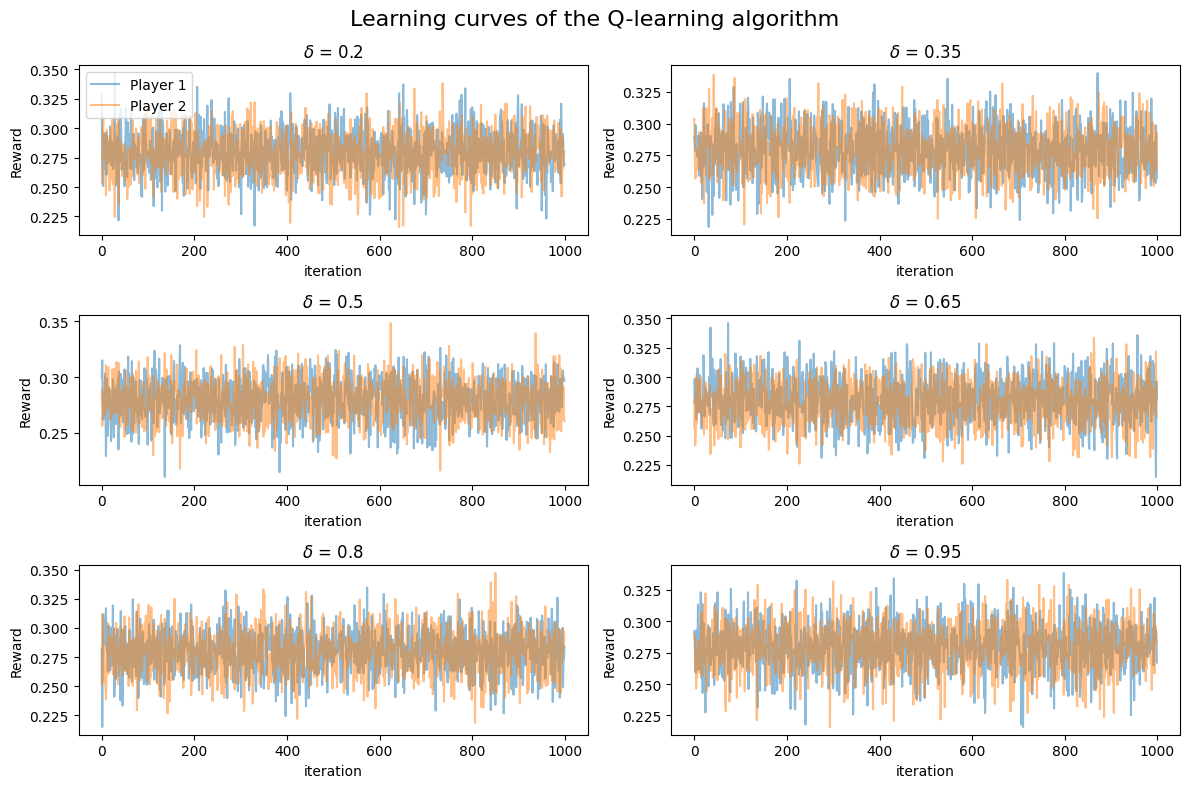

In [10]:
num_graphs = len(aggregated_agents)
delta = [0.20, 0.35, 0.50, 0.65, 0.80, 0.95]

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(aggregated_agents[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(aggregated_agents[graph_num][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'$\\delta$ = {delta[graph_num]}')
    
      # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend(loc='upper left') 

# Remove any unused subplots
if num_graphs < 4:
    for i in range(num_graphs, 4):
        fig.delaxes(axes[i])

# Create a legend in the first subplot
if graph_num == 0:
         # Legend in the top-left corner
        ax.spines['top'].set_visible(True)  # Show top spine
        ax.spines['right'].set_visible(True)  # Show right spine
        ax.spines['bottom'].set_visible(True)  # Show bottom spine
        ax.spines['left'].set_visible(True)  # Show left spine

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()


fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [12]:
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(DRmean)

[[0.49038885 0.51114456]
 [0.47751906 0.52302449]
 [0.51884146 0.47805496]
 [0.50753858 0.47435964]
 [0.50747129 0.48599917]
 [0.50948527 0.50563911]]


[0.5007667  0.50027177 0.49844821 0.49094911 0.49673523 0.50756219]


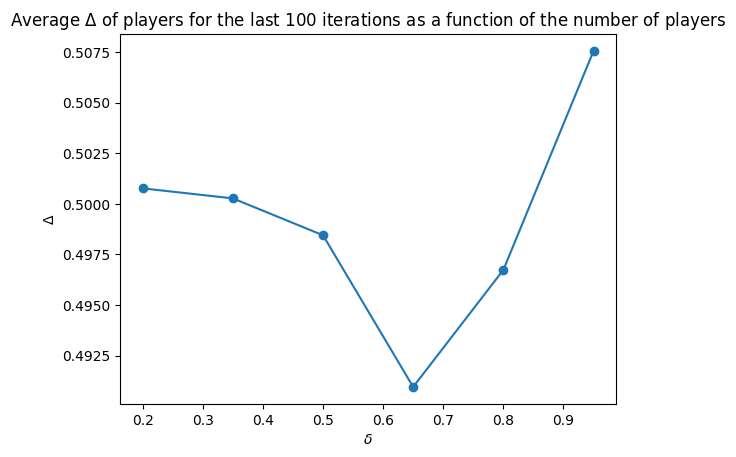

In [15]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot([0.20, 0.35, 0.50, 0.65, 0.80, 0.95],av, linestyle='-', marker='o')
plt.xlabel('$\\delta$')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations as a function of the number of players')
plt.show() #considerer les échatillons et faire une régression LOESS